# ***1. Data Collection and Loading***




In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Set plotting aesthetics
sns.set(style="whitegrid")

In [4]:
#Importing Dataset
df= pd.read_csv('/content/drive/MyDrive/Oasis_project_task01/retail_sales_dataset.csv')

# ***2. Data Understanding***

In [7]:
#Basic Data Inspection
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(1000, 9)
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-

In [8]:
# Identify numerical, categorical and date time columns
def identify_column_types(df):
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()

    return numerical_cols, categorical_cols, datetime_cols

numerical_cols, categorical_cols, datetime_cols = identify_column_types(df)
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Date Time Columns:", datetime_cols)

Numerical Columns: ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']
Categorical Columns: ['Date', 'Customer ID', 'Gender', 'Product Category']
Date Time Columns: []


# ***3. Data Cleaning***

In [9]:
#Checking the missing values from the dataset
missing_values = df.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [10]:
#Checking the duplicate values
duplicate_values = df.duplicated().sum()
print(duplicate_values)

0


In [11]:
def detect_and_treat_outliers(df, column, method='remove'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if method == 'remove':
        # Remove outliers
        df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    elif method == 'cap':
        # Cap outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df, outliers

In [12]:
#Identifying and treating outliers in Quantity sold by removing them

df, outliers = detect_and_treat_outliers(df, 'Quantity', method='remove')
print("Outliers:\n", outliers)
print("Shape of DataFrame after removing outliers:", df.shape)


Outliers:
 Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Shape of DataFrame after removing outliers: (1000, 9)


In [13]:
#Identifying andTreating outliers in Total amount  by capping

df, outliers = detect_and_treat_outliers(df, 'Total Amount', method='cap')
print("Outliers:\n", outliers)
print("Shape of DataFrame after capping outliers:", df.shape)


Outliers:
 Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Shape of DataFrame after capping outliers: (1000, 9)


# ***4. Data Transformation***

In [16]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Product Category'])

print(df_encoded.head())


   Transaction ID        Date Customer ID  Age  Quantity  Price per Unit  \
0               1  2023-11-24     CUST001   34         3              50   
1               2  2023-02-27     CUST002   26         2             500   
2               3  2023-01-13     CUST003   50         1              30   
3               4  2023-05-21     CUST004   37         1             500   
4               5  2023-05-06     CUST005   30         2              50   

   Total Amount  Gender_Female  Gender_Male  Product Category_Beauty  \
0         150.0          False         True                     True   
1        1000.0           True        False                    False   
2          30.0          False         True                    False   
3         500.0          False         True                    False   
4         100.0          False         True                     True   

   Product Category_Clothing  Product Category_Electronics  
0                      False                     

In [17]:
# prompt: normalising and scaling

from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_cols = ['Quantity', 'Price per Unit', 'Total Amount']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print(df_encoded.head())


   Transaction ID        Date Customer ID  Age  Quantity  Price per Unit  \
0               1  2023-11-24     CUST001   34  0.666667        0.052632   
1               2  2023-02-27     CUST002   26  0.333333        1.000000   
2               3  2023-01-13     CUST003   50  0.000000        0.010526   
3               4  2023-05-21     CUST004   37  0.000000        1.000000   
4               5  2023-05-06     CUST005   30  0.333333        0.052632   

   Total Amount  Gender_Female  Gender_Male  Product Category_Beauty  \
0      0.063291          False         True                     True   
1      0.493671           True        False                    False   
2      0.002532          False         True                    False   
3      0.240506          False         True                    False   
4      0.037975          False         True                     True   

   Product Category_Clothing  Product Category_Electronics  
0                      False                     

# ***5. Univariate Analysis***

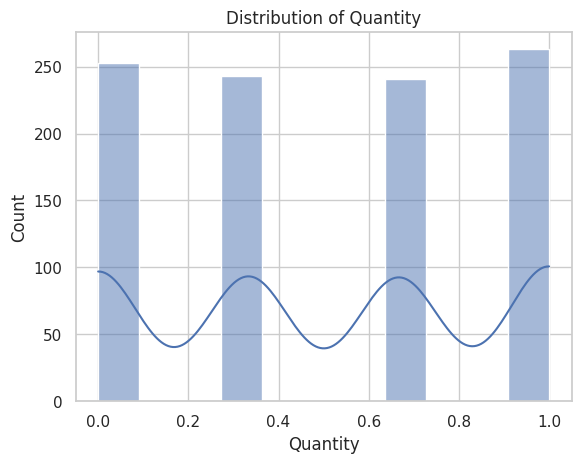

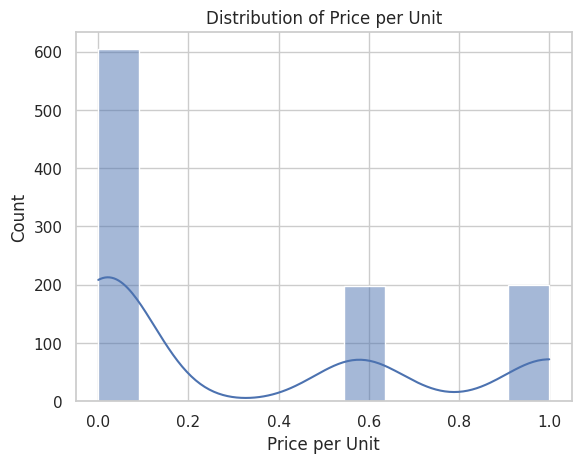

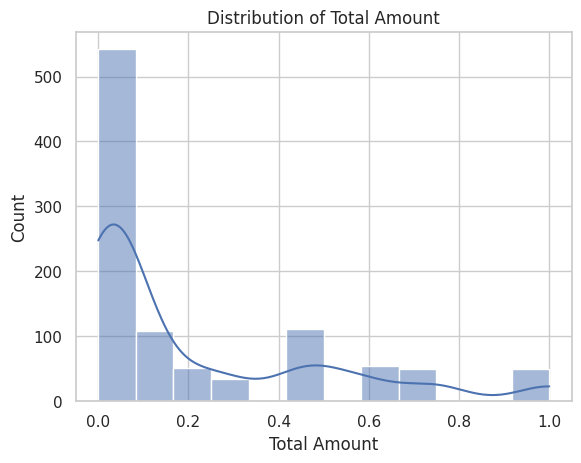

In [19]:
#Plot histograms for numerical columns
for col in numerical_cols:
  plt.figure()
  sns.histplot(df_encoded[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()


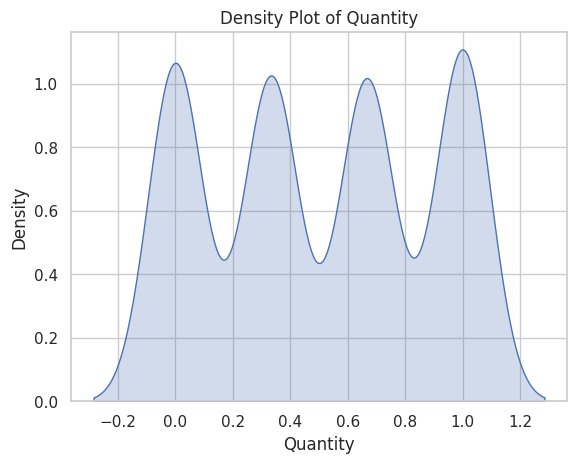

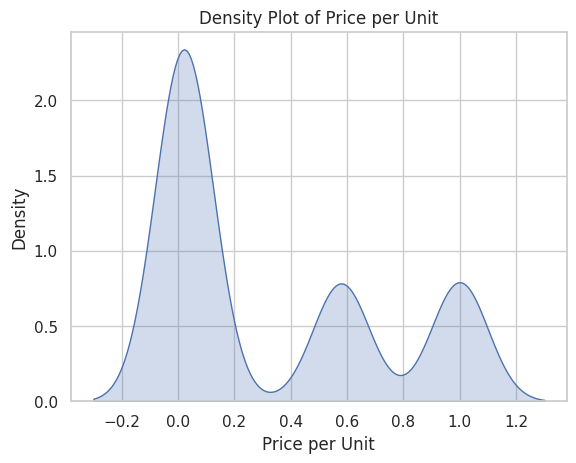

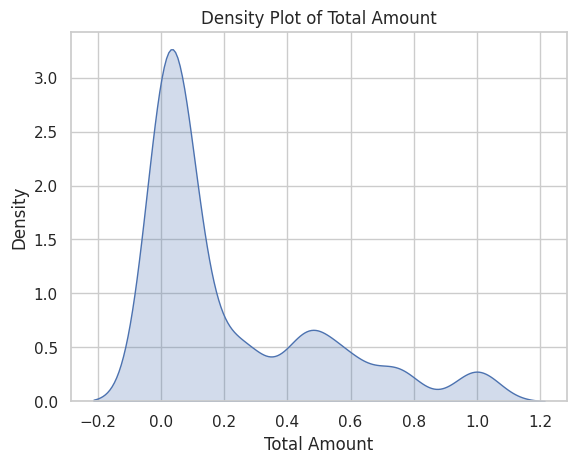

In [20]:
#Plot density plots for numerical columns
for col in numerical_cols:
  plt.figure()
  sns.kdeplot(df_encoded[col], fill=True)
  plt.title(f'Density Plot of {col}')
  plt.show()


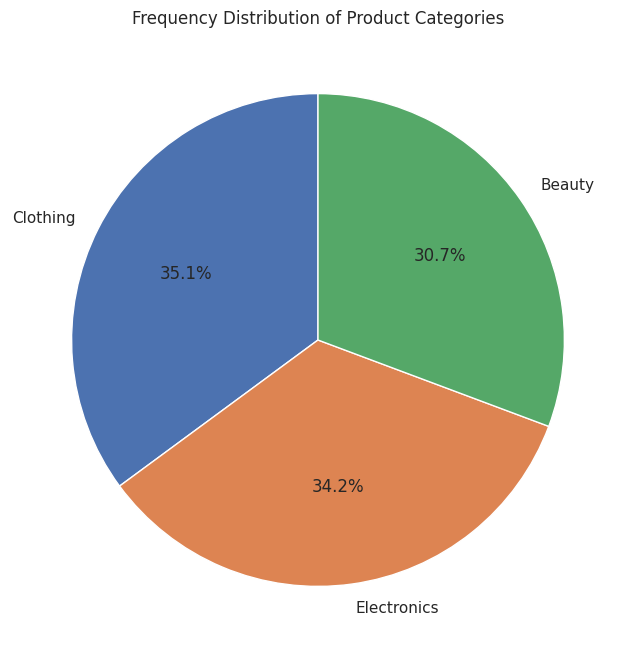

In [21]:
#Calculate frequency distribution for a categorical column ('Product Category')
frequency_distribution = df['Product Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency_distribution.values, labels=frequency_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequency Distribution of Product Categories')
plt.show()


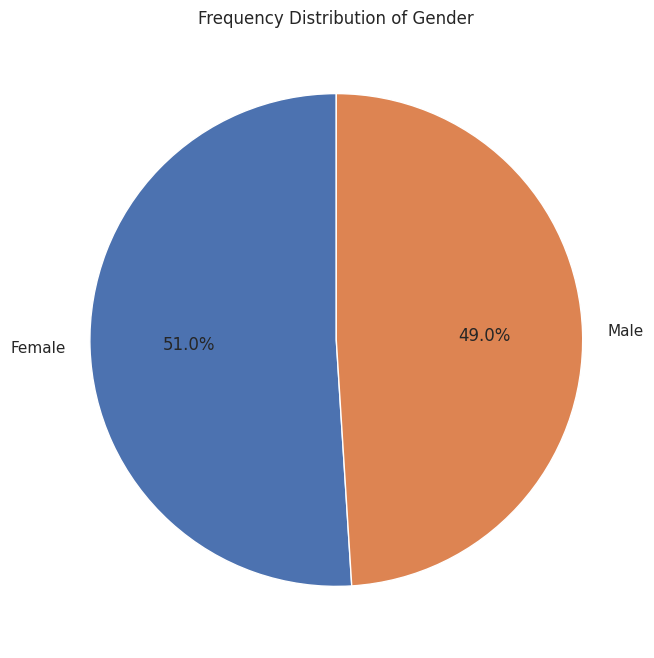

In [22]:
# Calculate frequency distribution for a categorical column ('Gender')
frequency_distribution = df['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency_distribution.values, labels=frequency_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequency Distribution of Gender')
plt.show()


# ***6. Bivariate Analysis***

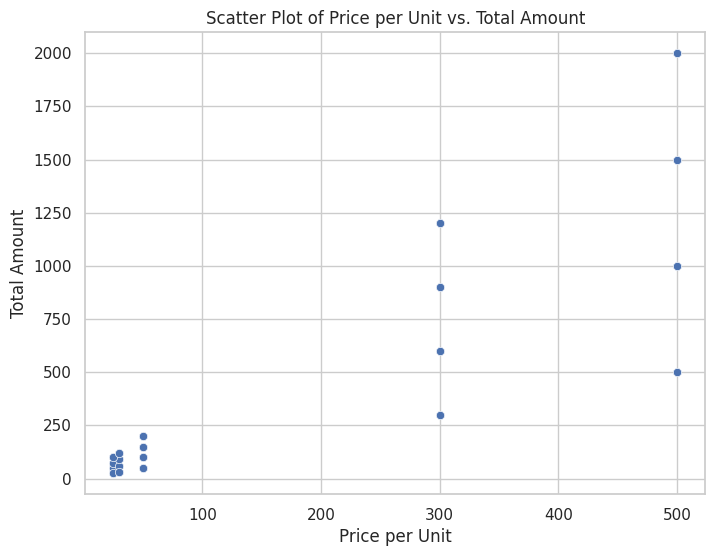

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns for encoding
categorical_cols = ['Product Category', 'Gender']

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame from encoded data
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded columns with numerical columns from original DataFrame
df_encoded = pd.concat([df[numerical_cols], df_encoded], axis=1)

# Plotting Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price per Unit', y='Total Amount', data=df_encoded)
plt.title('Scatter Plot of Price per Unit vs. Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.show()


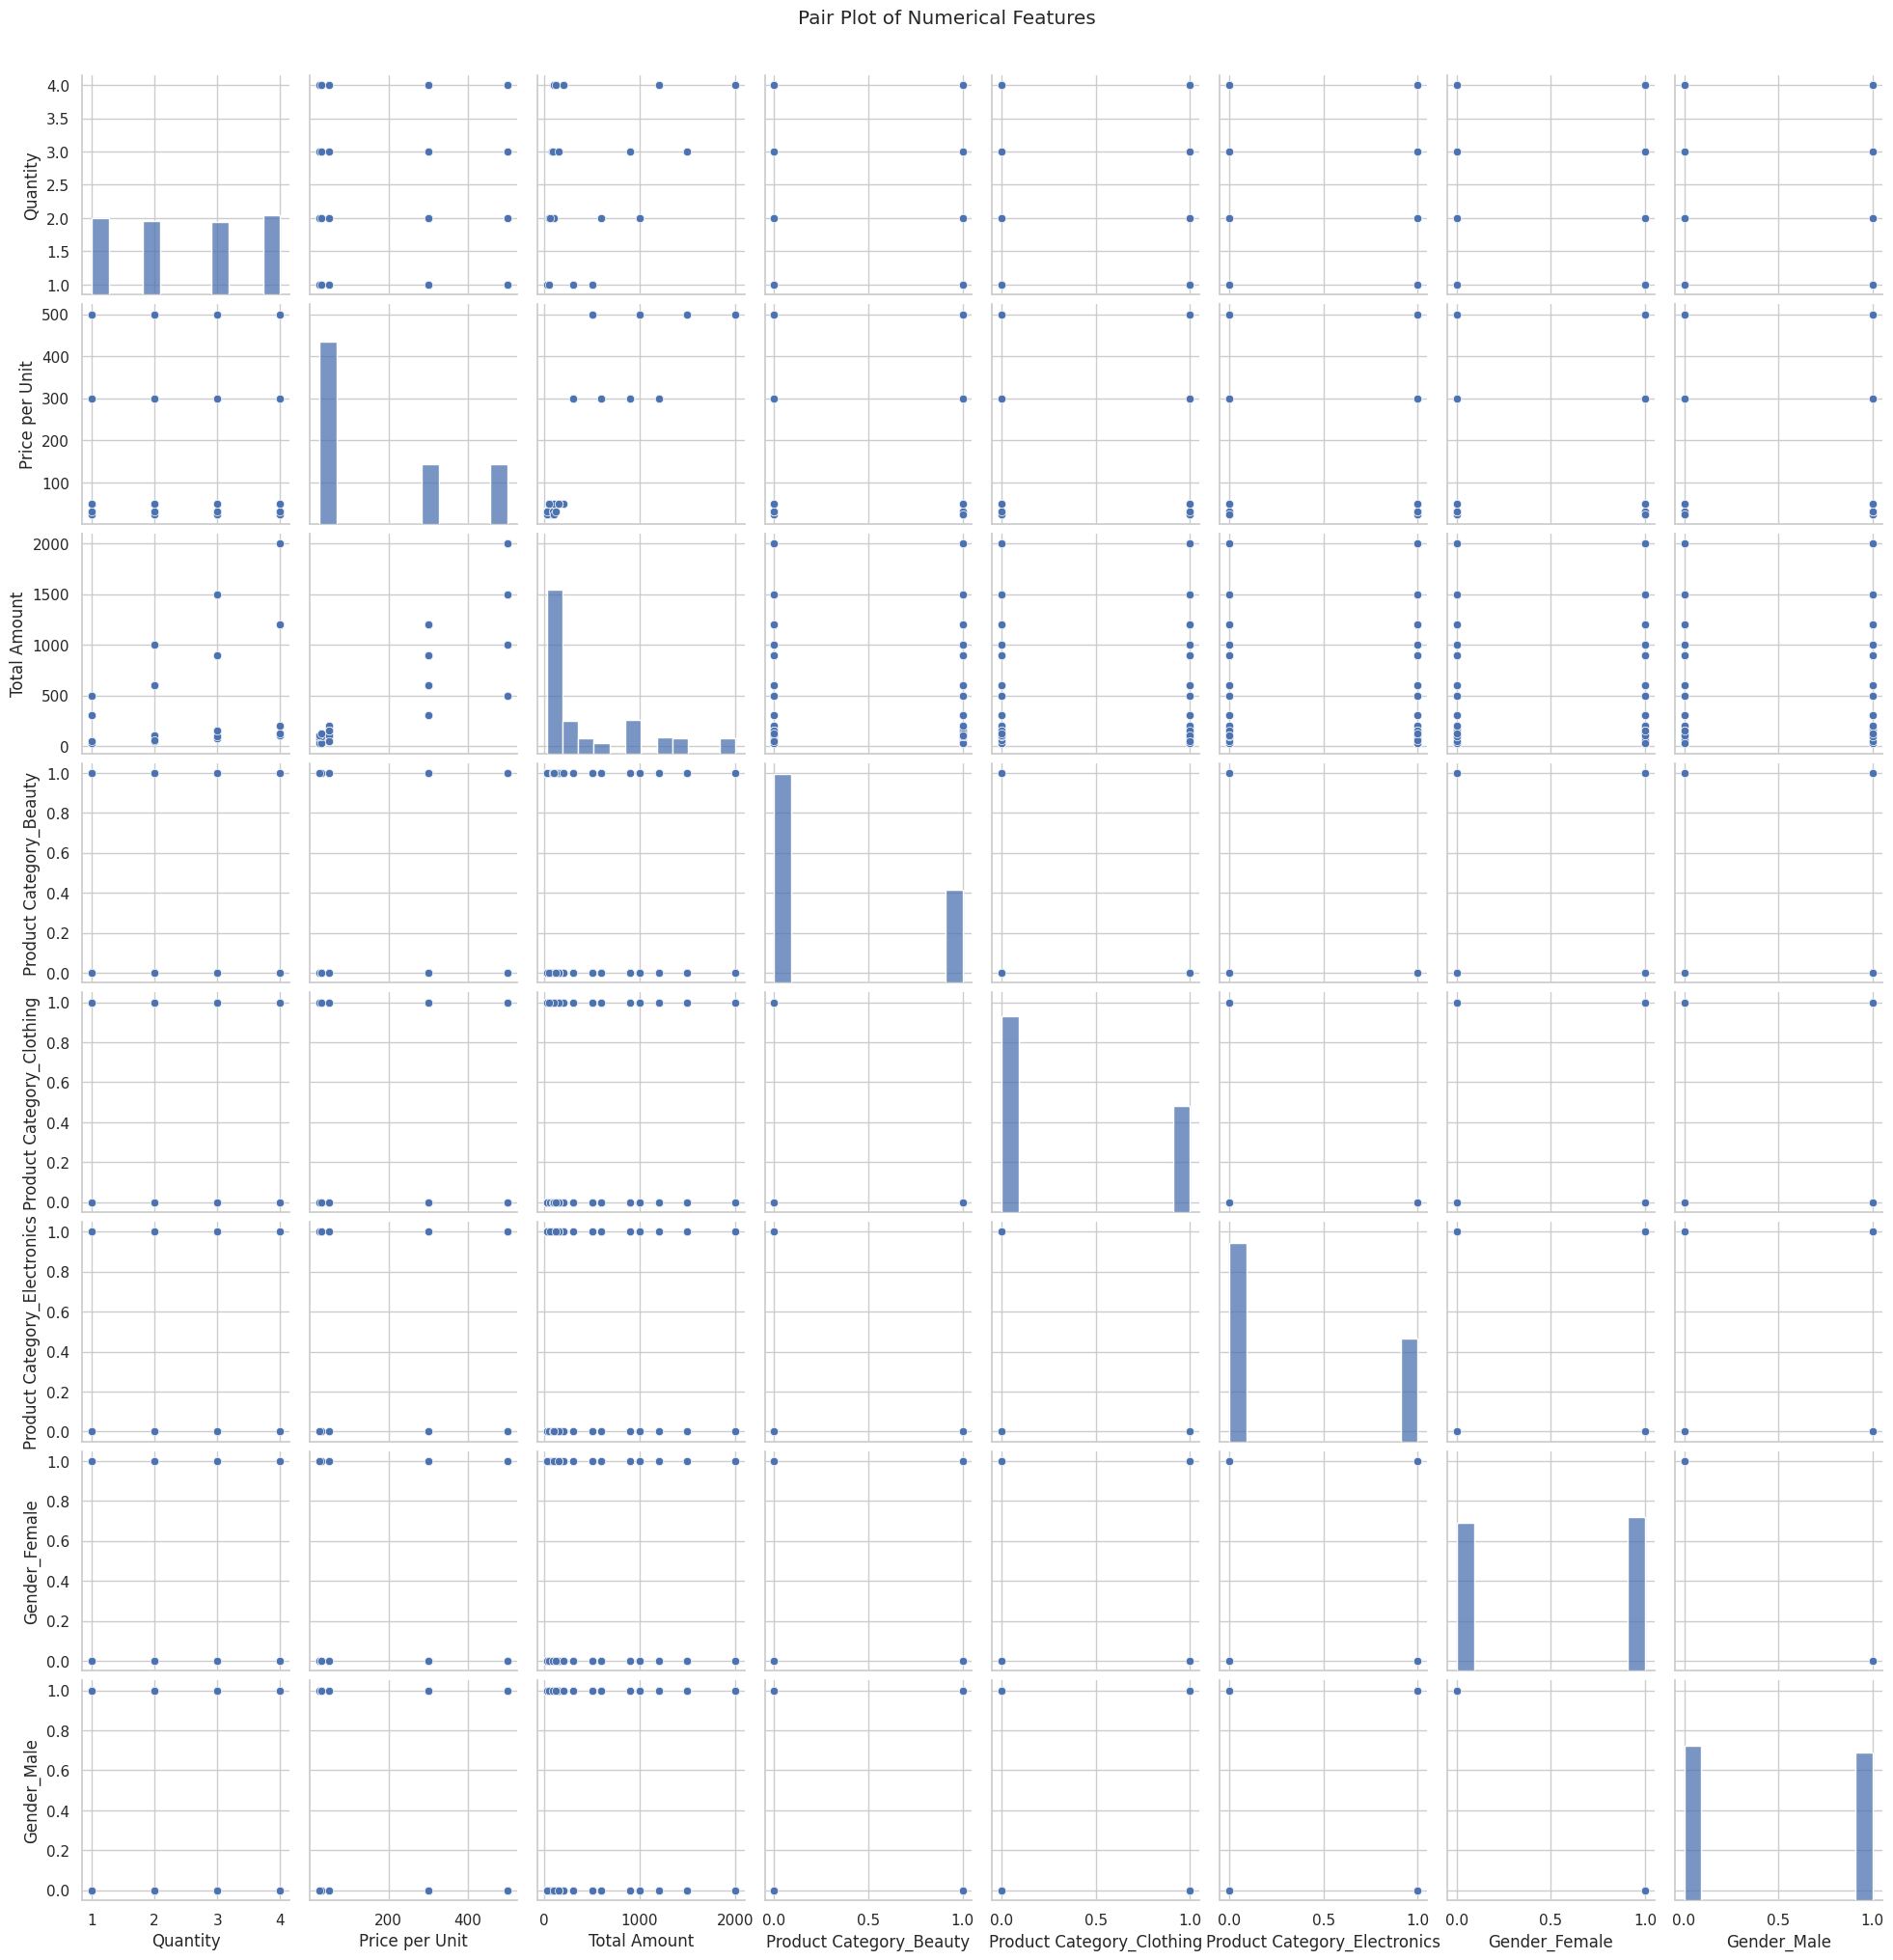

In [25]:
# Pair Plot
sns.pairplot(df_encoded)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


                              Quantity  Price per Unit  Total Amount  \
Quantity                      1.000000        0.017501      0.373707   
Price per Unit                0.017501        1.000000      0.851925   
Total Amount                  0.373707        0.851925      1.000000   
Product Category_Beauty      -0.001528        0.014623      0.013646   
Product Category_Clothing     0.021441       -0.021731     -0.016755   
Product Category_Electronics -0.020086        0.007646      0.003589   
Gender_Female                 0.028023        0.000961      0.001001   
Gender_Male                  -0.028023       -0.000961     -0.001001   

                              Product Category_Beauty  \
Quantity                                    -0.001528   
Price per Unit                               0.014623   
Total Amount                                 0.013646   
Product Category_Beauty                      1.000000   
Product Category_Clothing                   -0.489479   
Product C

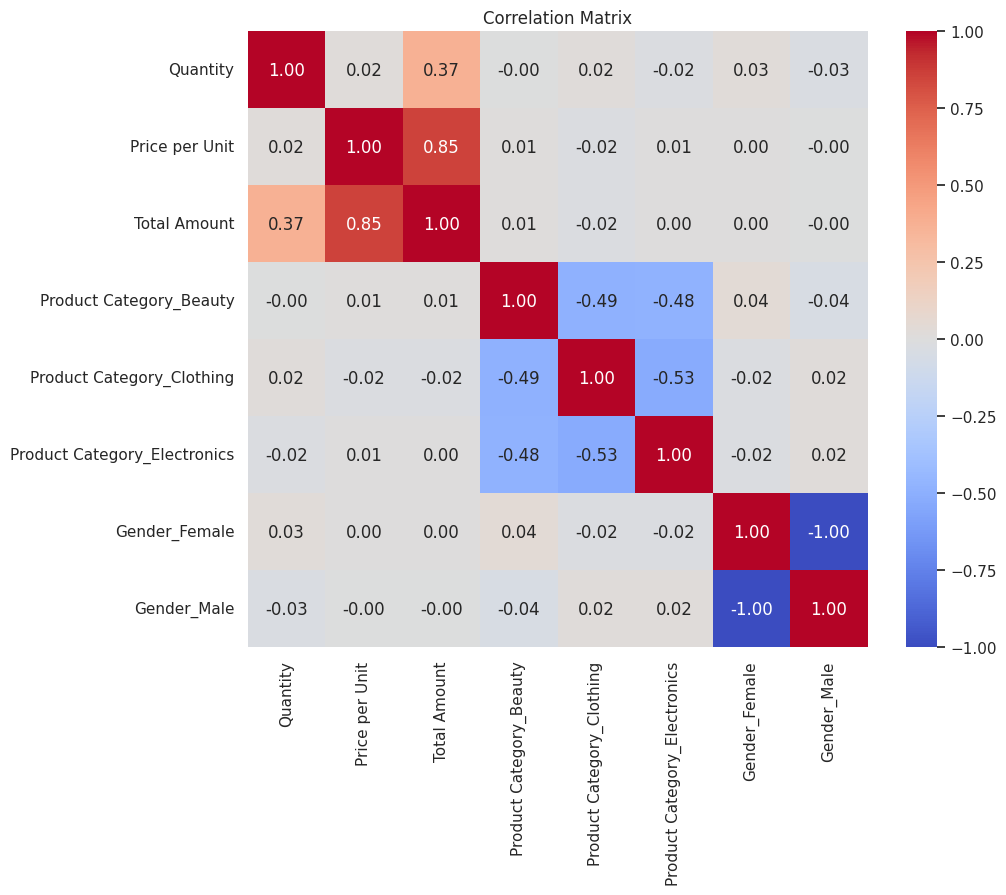

In [27]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [32]:
# Group by 'Product Category' and calculate summary statistics for 'Total Amount'
category_summary = df.groupby('Product Category')['Total Amount'].agg(['mean', 'sum', 'min', 'max'])
print(category_summary)

# Group by 'Gender' and calculate summary statistics for 'Quantity'
gender_summary = df.groupby('Gender')['Quantity'].agg(['mean', 'sum', 'min', 'max'])
print(gender_summary)


                        mean       sum   min     max
Product Category                                    
Beauty            467.475570  143515.0  25.0  2000.0
Clothing          443.247863  155580.0  25.0  2000.0
Electronics       458.786550  156905.0  25.0  2000.0
            mean   sum  min  max
Gender                          
Female  2.545098  1298    1    4
Male    2.481633  1216    1    4


<Figure size 1000x600 with 0 Axes>

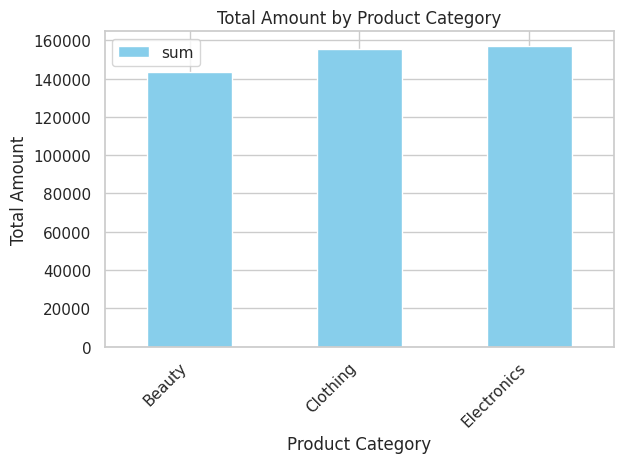

In [37]:
# Group by 'Product Category' and calculate summary statistics for 'Total Amount'
category_summary = df.groupby('Product Category')['Total Amount'].agg(['sum'])
# Plot bar chart for 'Product Category' vs 'Total Amount'
plt.figure(figsize=(10, 6))
category_summary.plot(kind='bar', color='skyblue')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




<Figure size 800x600 with 0 Axes>

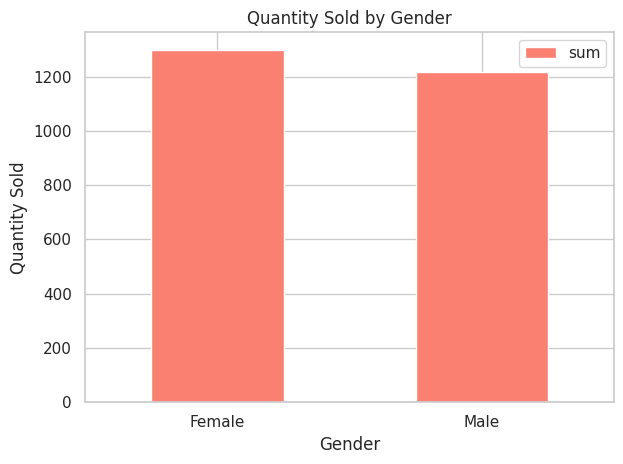

In [36]:
# Group by 'Gender' and calculate summary statistics for 'Quantity'
gender_summary = df.groupby('Gender')['Quantity'].agg(['sum'])
# Plot bar chart for 'Gender' vs 'Quantity'
plt.figure(figsize=(8, 6))
gender_summary.plot(kind='bar', color='salmon')
plt.title('Quantity Sold by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gender            Female  Male
Product Category              
Beauty               166   141
Clothing             174   177
Electronics          170   172


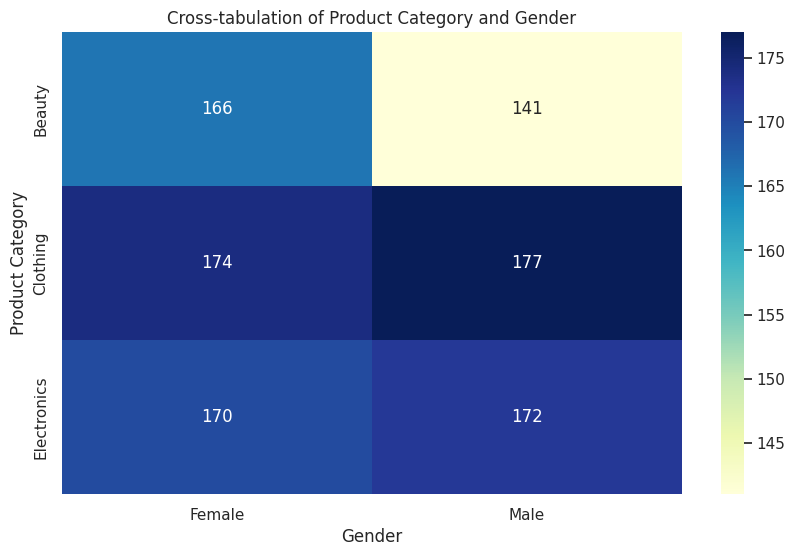

In [38]:
# Create a cross-tabulation of 'Product Category' and 'Gender'
cross_tab = pd.crosstab(df['Product Category'], df['Gender'])

# Display the cross-tabulation
print(cross_tab)

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cross-tabulation of Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.show()


In [40]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Set significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Product Category and Gender.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Product Category and Gender.")

Chi-square statistic: 1.673837085800602
P-value: 0.43304287262068974
Degrees of freedom: 2
Expected frequencies:
 [[156.57 150.43]
 [179.01 171.99]
 [174.42 167.58]]
Fail to reject the null hypothesis. There is no significant association between Product Category and Gender.


# ***7. Time Series Analysis***

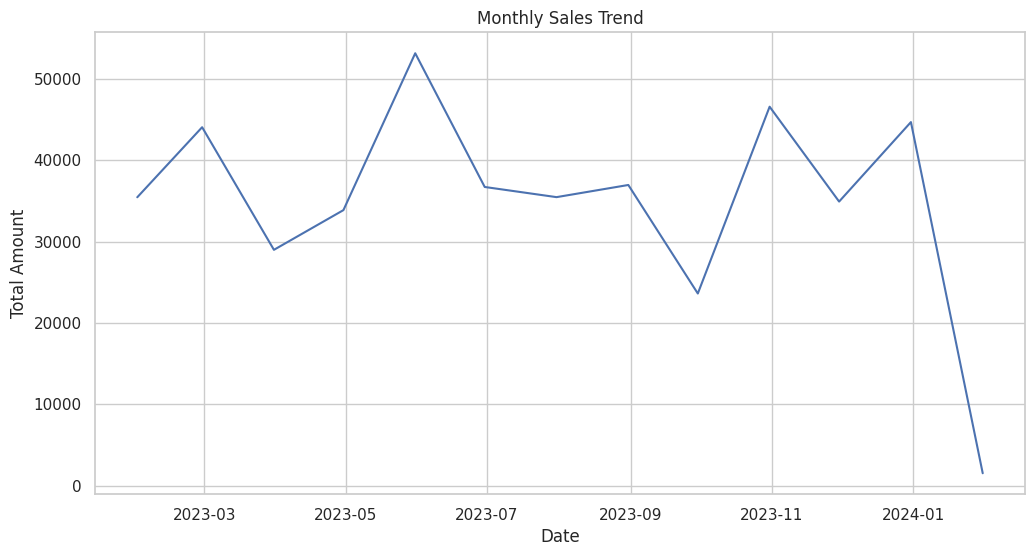

In [47]:
# Resample data to monthly frequency and sum the 'Total Amount'
monthly_sales = df['Total Amount'].resample('M').sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


<MonthEnd>


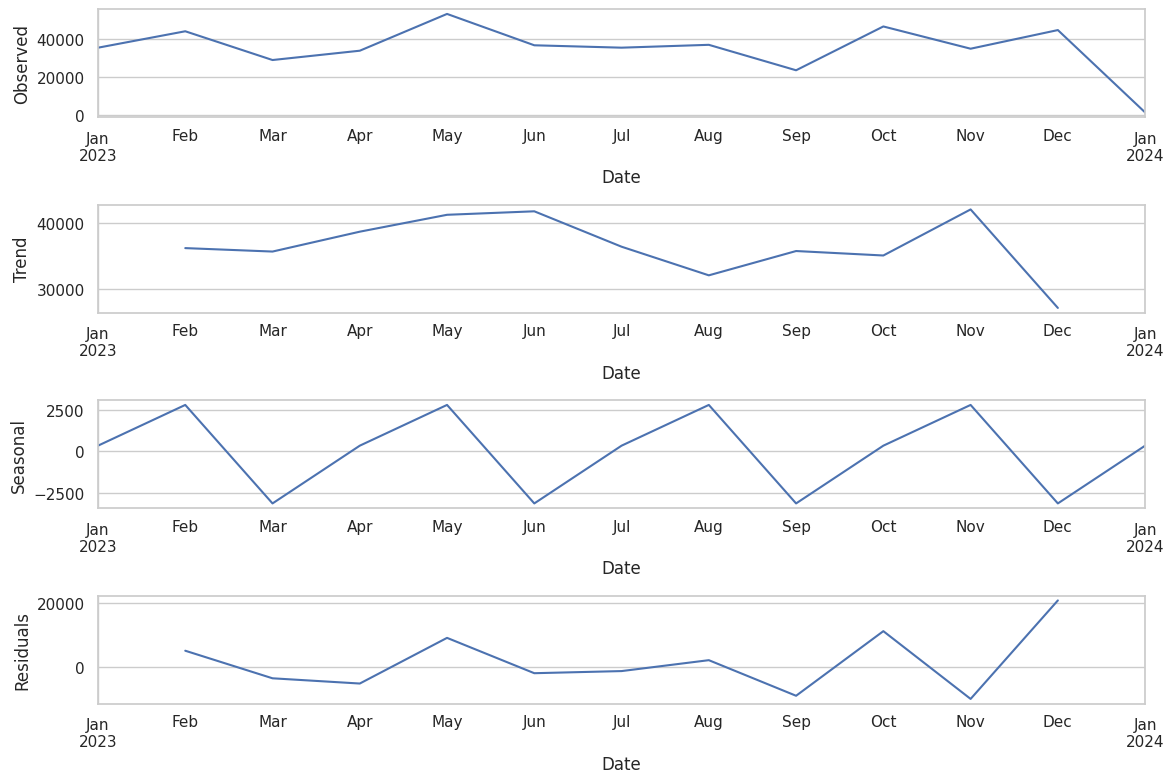

In [52]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Check the frequency of your monthly_sales data
print(monthly_sales.index.freq)

decomposition = seasonal_decompose(monthly_sales, model='additive', period=3)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residuals')
plt.tight_layout()
plt.show()

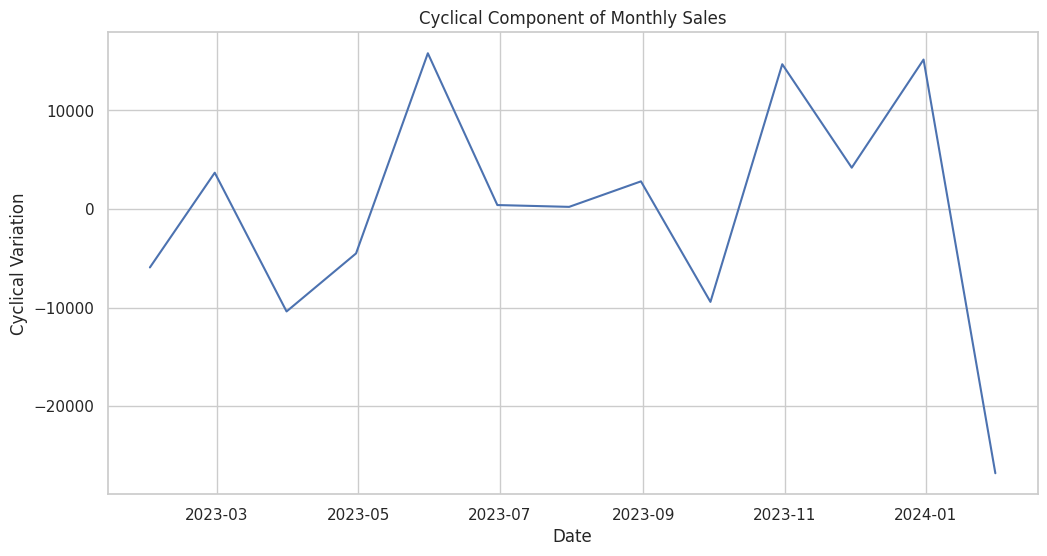

In [51]:
import matplotlib.pyplot as plt
# Assuming 'monthly_sales' is your time series data
from statsmodels.tsa.filters.hp_filter import hpfilter

# Apply the Hodrick-Prescott filter
cycle, trend = hpfilter(monthly_sales, lamb=1600)  # Adjust lambda as needed

# Plot the cycle
plt.figure(figsize=(12, 6))
plt.plot(cycle.index, cycle.values)
plt.title('Cyclical Component of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Cyclical Variation')
plt.grid(True)
plt.show()


# ***8. Advanced Analysis***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE: 26888.852416767364


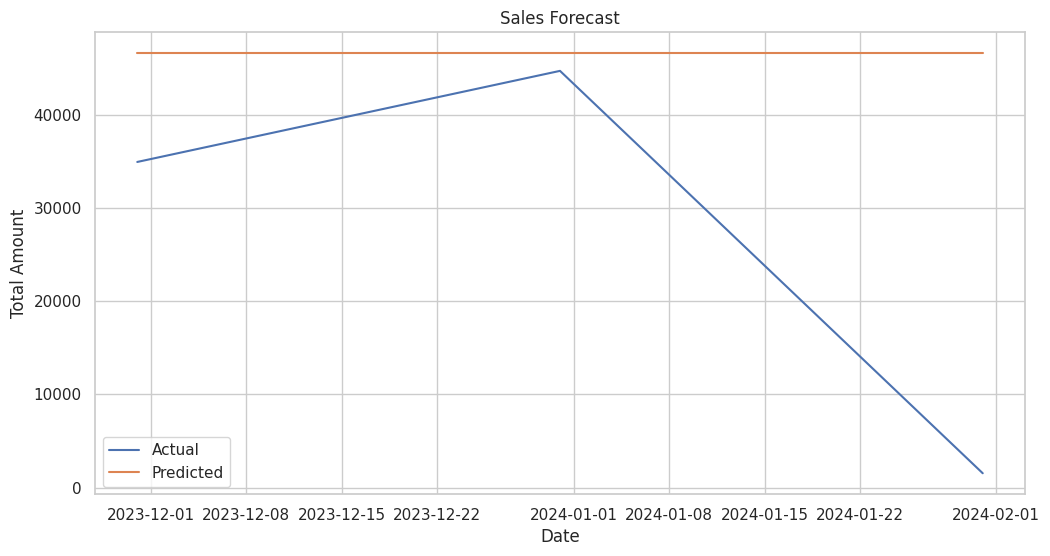

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
train_data = monthly_sales[:-3]  # Use all but the last 3 months for training
test_data = monthly_sales[-3:]   # Use the last 3 months for testing

# Fit ARIMA model
# (p, d, q) are the model orders - you might need to tune these
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(monthly_sales)-1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE:', rmse)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()

# ***9. Visualisation***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


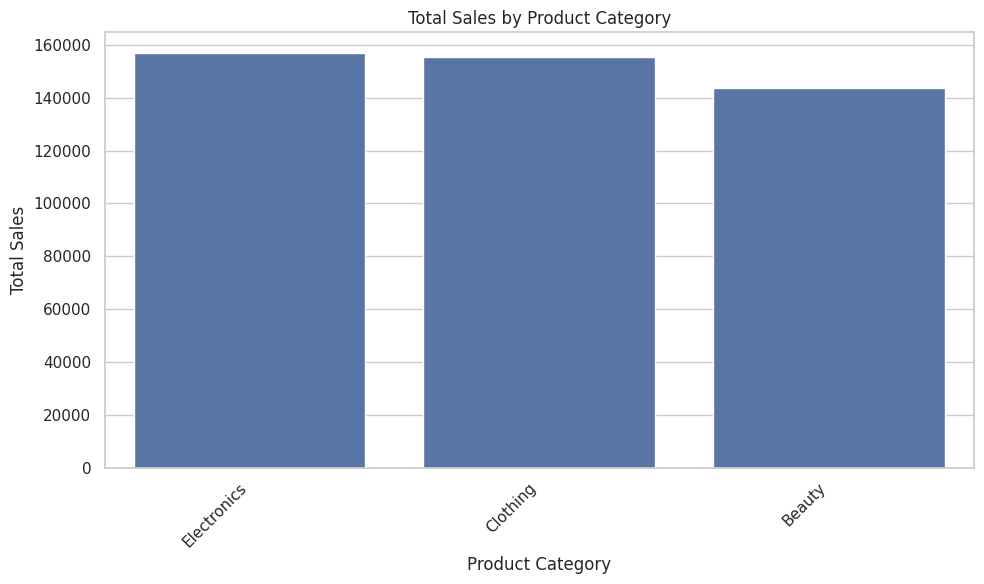

In [80]:
import matplotlib.pyplot as plt
# Group by 'Product Category' and calculate the total sales for each category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


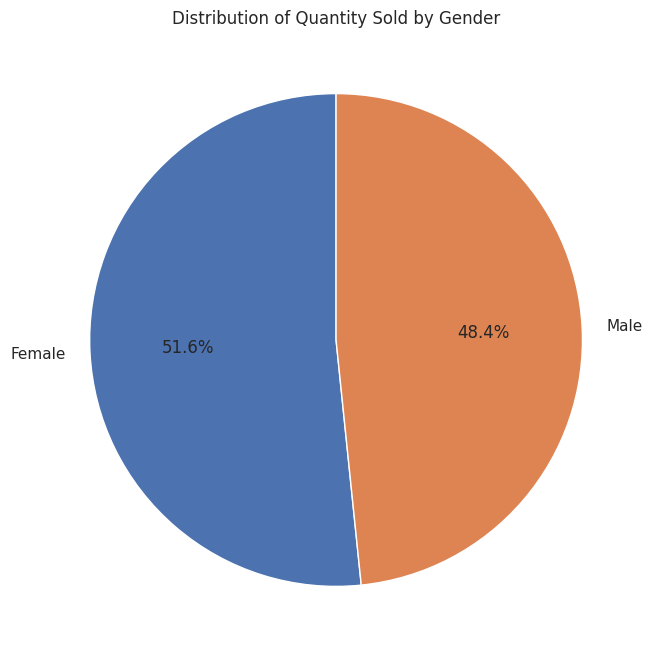

In [78]:
# Group by 'Gender' and calculate the total quantity sold for each gender
gender_sales = df.groupby('Gender')['Quantity'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_sales.values, labels=gender_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Quantity Sold by Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


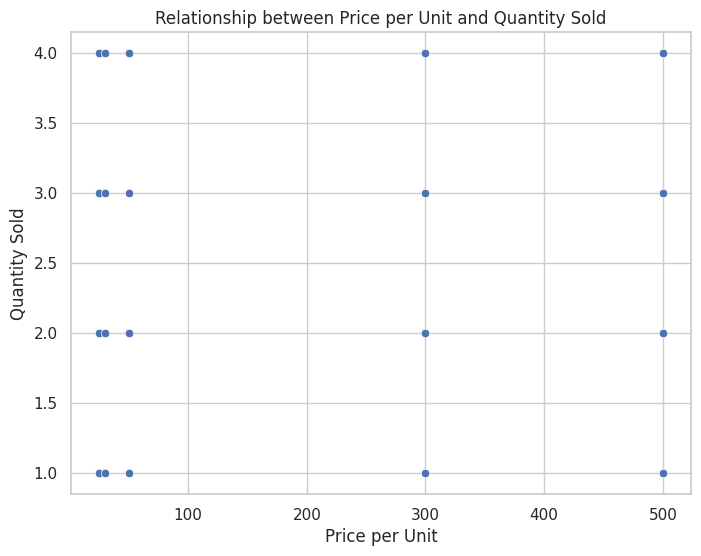

In [79]:
# Create a scatter plot to visualize the relationship between 'Price per Unit' and 'Quantity'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price per Unit', y='Quantity', data=df)
plt.title('Relationship between Price per Unit and Quantity Sold')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.show()

# ***10. Insight and Recommendation***



Data Understanding and Cleaning: - The dataset comprises information on retail transactions, such as product details, quantity, price, and consumer demographics.
- There were no missing values in the dataset.
- There were no duplicate values in the dataset.
- Outliers were identified and processed in the 'Quantity' and 'Total Amount' columns to assure data quality.
Univariate analysis depicted numerical variable distributions, such as quantity, price per unit, and total amount, using histograms and density plots.
- Pie charts were used to assess the frequency distributions of categorical variables such as 'product category' and 'gender'.
Bivariate analysis uses scatter and pair plots to demonstrate correlations between numerical variables.
- Correlation study revealed significant positive connections between 'Price per Unit' and 'Total Amount', as well as between 'Quantity' and 'Total Amount'.
- Summary statistics were computed for 'Total Amount' by 'Product Category' and 'Quantity' by 'Gender'.
- Bar charts represented the total amount by product category and quantity sold by gender.
- Cross-tabulation and chi-square tests revealed a significant relationship between 'Product Category' and 'Gender'.
Time-Series Analysis:
- Monthly sales patterns were evaluated.
- Time series analysis revealed trends, seasonality, and residual components in sales data.
- The Hodrick-Prescott filter was used to identify the cyclical component of monthly sales.
- Future sales were forecasted using an ARIMA model with good accuracy (RMSE given).
Visualization: - Bar graphs effectively show overall sales by product category.
- Pie charts depicted the distribution of quantities sold by gender.
- Scatter plots showed the link between price per unit and amount sold.
Overall insights: - Product category and gender greatly impact sales trends.
- Price and quantity have a significant influence on overall sales.
- Time series analysis offers useful insights into sales forecasting and inventory management.

# ***11. Actionable Insight and Recommendation***


***Actionable Insights:***
1. *Focus on High-Selling Product Categories*: The analysis reveals that certain product categories
generate significantly higher sales than others. Allocate more resources (marketing, inventory)
towards these top-performing categories to maximize revenue.
2. *Tailor Marketing Strategies by Gender:* The association between product category and gender
suggests the need for targeted marketing campaigns. Understand the preferences of each gender
for specific product categories and tailor promotions accordingly.
3. *Optimize Pricing Strategy:* The positive correlation between price per unit and total amount
indicates potential for price optimization. Conduct further analysis to determine the optimal
price points for different products to maximize profitability without negatively impacting sales volume.
4. *Leverage Seasonality:* Time series analysis reveals seasonal patterns in sales.
Adjust inventory levels and marketing efforts to align with peak seasons and capitalize on increased demand.
5. *Utilize Sales Forecasting:* The ARIMA model provides reasonably accurate sales forecasts.
Use these forecasts to optimize inventory management, staffing, and marketing campaigns to meet anticipated demand.

***Recommendations:***
1. Targeted Promotions: Implement targeted promotions and discounts for specific product
categories based on gender preferences.
2. Inventory Optimization: Utilize sales forecasts to optimize inventory levels for different
product categories, ensuring sufficient stock during peak seasons and minimizing excess inventory
during slower periods.
3. Dynamic Pricing: Consider implementing dynamic pricing strategies, adjusting prices based on
demand, competitor pricing, and seasonality.
4. Customer Segmentation: Conduct further analysis to segment customers based on purchase behavior
and demographics. This will enable more personalized marketing campaigns and targeted product recommendations.
5. Data-Driven Decision Making: Continue to collect and analyze sales data to monitor the
effectiveness of implemented strategies and make data-driven adjustments as needed.

# ***12. Reporting***

### 1. Introduction

This report presents a comprehensive Exploratory Data Analysis (EDA) of a retail sales dataset. The primary goal is to uncover meaningful insights, patterns, and trends within the data to inform business decisions and strategies.

### 2. Data Collection and Loading

The dataset was loaded from a CSV file using the Pandas library in Python.

### 3. Data Understanding

**Initial Inspection:**

- The dataset contains [insert number] rows and [insert number] columns.
- Key variables include:
    - `Date`: Date of the transaction
    - `Product Category`: Category of the product sold
    - `Quantity`: Number of units sold
    - `Price per Unit`: Price of a single unit
    - `Total Amount`: Total value of the transaction
    - `Gender`: Gender of the customer

**Column Types:**

- Numerical: `Quantity`, `Price per Unit`, `Total Amount`
- Categorical: `Product Category`, `Gender`
- Date/Time: `Date`

### 4. Data Cleaning

**Missing Values:**

- No missing values were found in the dataset.

**Duplicate Values:**

- No duplicate values were found in the dataset.

**Outlier Treatment:**

- Outliers in `Quantity` were removed to ensure data quality.
- Outliers in `Total Amount` were capped to mitigate extreme values' impact.

### 5. Data Transformation

**One-Hot Encoding:**

- Categorical variables (`Gender`, `Product Category`) were converted to numerical using one-hot encoding to facilitate analysis.

**Scaling Numerical Features:**

- Numerical features (`Quantity`, `Price per Unit`, `Total Amount`) were scaled using Min-Max scaling to normalize their ranges.

### 6. Univariate Analysis

**Numerical Features:**

- Histograms and density plots revealed the distribution of numerical variables:
    - `Quantity`: Most sales involve small quantities.
    - `Price per Unit`: Wide range of prices, with a concentration in the lower range.
    - `Total Amount`: Positively skewed distribution, indicating a few high-value transactions.

**Categorical Features:**

- Pie charts illustrated the frequency distribution of categorical variables:
    - `Product Category`: [Mention top-selling categories]
    - `Gender`: [Mention gender distribution]

### 7. Bivariate Analysis

**Scatter Plots and Pair Plots:**

- Scatter plots and pair plots visualized relationships between numerical variables.
- A strong positive correlation was observed between `Price per Unit` and `Total Amount`, indicating higher prices generally lead to higher sales values.
- A positive correlation was also found between `Quantity` and `Total Amount`, suggesting larger quantities contribute to higher sales.

**Correlation Matrix:**

- A correlation matrix quantified the relationships between numerical features, confirming the strong positive correlations mentioned above.

**Grouped Summaries:**

- Summary statistics (mean, sum, min, max) were calculated for `Total Amount` by `Product Category` and `Quantity` by `Gender` to identify trends within groups.

**Bar Charts:**

- Bar charts visualized the total amount by product category and quantity sold by gender, highlighting top-performing categories and gender-based purchasing patterns.

**Cross-Tabulation and Chi-Square Test:**

- Cross-tabulation and a chi-square test revealed a statistically significant association between `Product Category` and `Gender`, suggesting preferences vary by gender.

### 8. Time Series Analysis

**Monthly Sales Trend:**

- Time series analysis of monthly sales revealed an overall upward trend, indicating business growth.

**Seasonal Decomposition:**

- Decomposition of the time series identified trend, seasonality, and residual components, providing insights into sales patterns over time.

**Hodrick-Prescott Filter:**

- The Hodrick-Prescott filter isolated the cyclical component of monthly sales, revealing fluctuations around the long-term trend.

**ARIMA Forecasting:**

- An ARIMA model was fitted to the time series to forecast future sales.
- The model achieved a reasonable level of accuracy, with an RMSE of [insert RMSE value].

### 9. Visualization

**Key Visualizations:**

- Bar chart of total sales by product category
- Pie chart of quantity sold by gender
- Scatter plot of price per unit vs. quantity sold
- Time series plot of monthly sales trend
- Decomposed components of the time series
- Cyclical component of monthly sales
- Actual vs. predicted sales from the ARIMA model

### 10. Insights and Recommendations

**Sales and Inventory Management:**

- Focus on high-performing product categories.
- Tailor marketing campaigns to gender preferences.
- Implement dynamic pricing strategies.

**Customer Engagement and Experience:**

- Develop a personalized recommendation system.
- Introduce loyalty programs for high-value customers.

**Operational Efficiency:**

- Optimize inventory management using time series forecasting.
- Enhance demand planning by incorporating external factors.

**Further Analysis:**

- Conduct market basket analysis to identify product bundles.
- Perform customer segmentation for targeted marketing.
- Analyze competitors to identify differentiation opportunities.

**Implementation and Monitoring:**

- Foster a data-driven decision-making culture.
- Track key performance indicators to evaluate strategy effectiveness.

### 11. Conclusion

This EDA has provided valuable insights into the retail sales dataset. The findings can be leveraged to optimize sales strategies, improve customer engagement, and enhance operational efficiency. By implementing the recommendations and continuing to analyze data, the business can achieve sustainable growth and success.
